<a href="https://colab.research.google.com/github/rameshbabulakshmanan84/AI-Day---Knowledge-Graph/blob/master/BookRecommendation1_v0.7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the libraries
import pandas as pd
import os
import gensim

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore')

In [4]:
print(os.getcwd())

/content


In [5]:
df=pd.read_excel("/content/drive/My Drive/Online Retail.xlsx")

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.shape

(541909, 8)

In [8]:
#preprocessing
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
#drop the missing rows
df.dropna(inplace=True)

In [10]:
#Updated after sropping missing values
df.shape

(406829, 8)

In [11]:
#check the unique customers in dataset
len(df['CustomerID'].unique())
#4372 unique customers are there

4372

In [12]:
df['StockCode']= df['StockCode'].astype(str)

In [13]:
#Shuffle customer ids
customers=df['CustomerID'].unique().tolist()
#length
len(customers)

4372

In [14]:
import random
#shuffle customer ids
random.shuffle(customers)

In [15]:
#set the training and validation apart
#extract 90% of customer ids for training
customers_train=[customers[i] for i in range(round(0.9*len(customers)))]

In [16]:
#assign train and validatin set
#Train set
train_df=df[df['CustomerID'].isin(customers_train)]
#validation set
val_df=df[~df['CustomerID'].isin(customers_train)]

In [17]:
#list to create ourchase history
# list to capture purchase history of the customers
purchases_train = []

# populate the list with the product codes
for i in customers_train:
    temp = train_df[train_df["CustomerID"] == i]["StockCode"].tolist()
    purchases_train.append(temp)


In [18]:
#list to create ourchase history
# list to capture purchase history of the customers
val_train = []

# populate the list with the product codes
for i in val_df['CustomerID'].unique():
    temp = val_df[val_df["CustomerID"] == i]["StockCode"].tolist()
    val_train.append(temp)

In [19]:
val_train

[['22867', 'POST'],
 ['21889',
  '21892',
  '21891',
  '21890',
  '21718',
  '21716',
  '21715',
  '22113',
  '22111',
  '22110',
  '22358',
  '22357',
  '22115',
  '22969'],
 ['21314',
  '84029E',
  '21137',
  '22041',
  '20979',
  '20977',
  '22619',
  '22571',
  '22595',
  '22593',
  '22633',
  '22632',
  '22423',
  '22411',
  '21137',
  '22041',
  '20685',
  '22632',
  '22633',
  '22900',
  '21868',
  '21175',
  '82582',
  '85049E',
  '85049A',
  '20801',
  '21876',
  '22638',
  '84946',
  '22041',
  '21137',
  '10135',
  '85054',
  '22720',
  '22965',
  '22619',
  '21137',
  'M',
  '22507',
  '85123A',
  '22041',
  '21137',
  '23144',
  '23134',
  '22666',
  '21137',
  '22041',
  '22507',
  '22666',
  '21137',
  '85123A',
  '23144',
  '21533',
  '21172',
  '21174',
  '84596B',
  '85132A',
  '85132C',
  '22507',
  '23145',
  '22666',
  '22041',
  '21137',
  '21137',
  '23201',
  '23202',
  '21931',
  '22423',
  '23173',
  '22943',
  '21137',
  '22041',
  '21137',
  '23173',
  '7145

In [20]:
#import fasttext 
from gensim.models import FastText

In [24]:
#Call fasttext model with necessary params
model_ft = FastText(window = 10,sg = 1,hs = 0,negative = 10,alpha=0.03, min_alpha=0.0007,seed = 14)

In [25]:
#build vocab using fasttext
model_ft.build_vocab(purchases_train, progress_per=200)

In [ ]:
#Train the model
model_ft.train(purchases_train,total_examples=model_ft.corpus_count,epochs=10,report_delay=1)
#minimum and maximum n grams size ? 
#min_n : Deafault 3
#Max_n:  Default 6 



Exception in thread Thread-47:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/gensim/models/base_any2vec.py", line 211, in _worker_loop
    tally, raw_tally = self._do_train_job(data_iterable, job_parameters, thread_private_mem)
  File "/usr/local/lib/python3.6/dist-packages/gensim/models/fasttext.py", line 593, in _do_train_job
    tally += train_batch_sg(self, sentences, alpha, work, neu1)
  File "gensim/models/fasttext_inner.pyx", line 322, in gensim.models.fasttext_inner.train_batch_sg
TypeError: 'NoneType' object is not subscriptable
Exception in thread Thread-48:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target

KeyboardInterrupt: ignored

In [26]:
print(model_ft)

FastText(vocab=3179, size=100, alpha=0.03)


In [30]:
model_ft.save("fasttext.model")

In [32]:
model_ft1=FastText.load("fasttext.model")

In [35]:
print(model_ft1.wv.vocab)

{'85027L': <gensim.models.keyedvectors.Vocab object at 0x7f1faf2a40b8>, '22843': <gensim.models.keyedvectors.Vocab object at 0x7f1faa0afcc0>, '21713': <gensim.models.keyedvectors.Vocab object at 0x7f1faa0afb70>, '22841': <gensim.models.keyedvectors.Vocab object at 0x7f1faa0af9b0>, '20992': <gensim.models.keyedvectors.Vocab object at 0x7f1faa0af898>, '20996': <gensim.models.keyedvectors.Vocab object at 0x7f1faa0af438>, '20854': <gensim.models.keyedvectors.Vocab object at 0x7f1faf29a9b0>, '15056N': <gensim.models.keyedvectors.Vocab object at 0x7f1faf29a278>, '15056BL': <gensim.models.keyedvectors.Vocab object at 0x7f1faf29a390>, '20984': <gensim.models.keyedvectors.Vocab object at 0x7f1faf29a860>, '22277': <gensim.models.keyedvectors.Vocab object at 0x7f1faf29a320>, '22476': <gensim.models.keyedvectors.Vocab object at 0x7f1faf29a128>, '85099C': <gensim.models.keyedvectors.Vocab object at 0x7f1faf29ad68>, '22639': <gensim.models.keyedvectors.Vocab object at 0x7f1faf29ada0>, '22089': <gens

In [33]:
print(model_ft1.wv.vectors)

[[-3.3389388e-03  4.7151605e-03  3.8780926e-03 ...  3.0232631e-03
  -5.8599697e-05 -1.1103330e-03]
 [-2.7831250e-03 -4.1053472e-03  4.4143111e-03 ... -1.3610808e-04
  -3.9752112e-03  2.4863852e-03]
 [ 1.8737641e-03  3.5954395e-03 -3.3470895e-03 ...  2.9191056e-03
  -1.0702733e-04 -7.9005823e-04]
 ...
 [ 3.5041505e-03 -2.9001553e-03  3.7329318e-04 ... -3.2525198e-03
   3.4586946e-04 -1.6959050e-03]
 [-1.3510148e-03 -8.9344429e-04  3.0269241e-03 ...  2.9036833e-03
   4.0519675e-03  5.1734975e-04]
 [ 5.8279472e-04 -4.9096365e-03  3.6077877e-03 ... -4.4588707e-03
  -4.6369187e-03  4.1424856e-03]]


In [ ]:
#vectors for fasttext
model_ft.wv.vectors

array([[-0.07343318, -0.02422285,  0.00161303, ..., -0.38077173,
        -0.25473878,  0.29209962],
       [-0.2612037 ,  0.09539601,  0.22055036, ..., -0.18076709,
        -0.11417715,  0.14456156],
       [ 0.0397023 , -0.02828298,  0.3435261 , ..., -0.24452324,
        -0.51298064, -0.09561366],
       ...,
       [-0.16288768,  0.07569911,  0.15900199, ..., -0.41559172,
        -0.26358324,  0.22472551],
       [ 0.29270998,  0.49342752, -0.67639524, ..., -0.19222659,
        -0.37413684, -0.03259123],
       [ 0.264182  , -0.31035796,  0.21707784, ..., -0.7304366 ,
        -0.18224326, -0.12541704]], dtype=float32)

In [ ]:
#Visualize the embeddings
#use tsne
X_pca=model_ft.wv.vectors
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2).fit_transform(X_pca)
tsne.shape

(3180, 2)

In [ ]:
vocab1=list(model_ft.wv.vocab)
df2 = pd.DataFrame(tsne, index=vocab1,columns=['X','Y'])

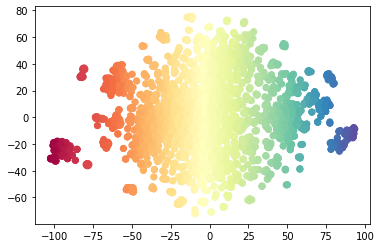

In [ ]:
#Visualize the TSNE plot
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
#%matplotlib inline
ax.scatter(df2['X'],df2['Y'],c=df2['X'],cmap='Spectral')
#label the data
#ax.set_xlim(-40,40)
#ax.set_ylim(-30,30)
plt.show()

In [ ]:
#Build wor2vecembeddings for the products
from gensim.models import Word2Vec


In [ ]:
#train the model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

In [ ]:
model.build_vocab(purchases_train, progress_per=200)

In [ ]:
#Word2Vec expects a sentence to be "list of strings", not "list of ints". I suspect you'll have other issues too, if you break that contract.

In [ ]:
model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(3617617, 3654860)

In [ ]:
#Normalization of the raw vectors to unit vectors
model.init_sims(replace=True)

In [ ]:
#Model Summary
print(model)

Word2Vec(vocab=3161, size=100, alpha=0.03)


In [ ]:
model.wv.vectors

array([[-0.05317033,  0.16316845,  0.05070518, ..., -0.057835  ,
         0.02282016,  0.12010154],
       [-0.24778524,  0.11479899,  0.18382025, ...,  0.00590302,
        -0.03879118,  0.01946688],
       [ 0.02033521,  0.07603482,  0.14630175, ...,  0.12210882,
         0.05910416,  0.12656242],
       ...,
       [-0.13128325, -0.02889344,  0.1152883 , ..., -0.19520232,
         0.1077261 , -0.025382  ],
       [ 0.06235427,  0.1788169 ,  0.02623857, ..., -0.12511154,
        -0.06247545,  0.14203523],
       [ 0.13650183,  0.11201587,  0.01165657, ..., -0.08272605,
         0.15527862, -0.07722948]], dtype=float32)

In [ ]:
model.wv.vectors.shape

(3161, 100)

In [ ]:
#GET the vocab
vocab=list(model.wv.vocab)
print(vocab)


['21770', '82582', '21165', '21164', '21455', '22693', '22228', '22232', '22231', '22233', '21206', '21204', '21380', '21749', '21746', '21850', '21621', '22120', '23301', '23320', '22185', '21922', '22423', '21066', '21067', '22457', '22938', '22993', '22926', '22925', '23154', '23156', '22699', '22698', '22156', '20752', '84991', '21975', '22417', '22951', '21215', '84992', '21976', '21212', '21977', '84988', '22720', '22282', '22283', '22776', '22090', '20914', '22084', '21034', '20754', '22088', '22794', '22913', '22914', '22771', '22789', '22969', '22980', '22979', '21670', '22296', '21390', '21533', '22962', '21535', '21531', '21713', '22840', '84978', '21671', '21669', '21668', '21534', '84997A', '84997B', '85146', '22960', '22697', '21745', '23182', '85053', '21385', '23178', '21754', '22148', '21626', '21786', '21787', '22804', '85123A', '21464', '21915', '21914', '82482', '21878', '82494L', '21625', '48194', '47590A', '47590B', '47566B', '22822', '47566', '47599A', '47599B', 

In [ ]:
#Visualize the embeddings
#use tsne
X_pca=model.wv.vectors
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2).fit_transform(X_pca)
tsne.shape

(3161, 2)

In [ ]:
df1 = pd.DataFrame(tsne, index=vocab,columns=['X','Y'])
#view the df
df1

,X,Y
21770,26.771858,20.844387
82582,-6.526692,25.911140
21165,-32.783592,0.124724
21164,31.014458,29.589230
21455,-16.430592,-14.517894
...,...,...
90209B,21.415934,53.050610
DOT,40.254368,-13.300147
CRUK,40.230663,-8.931052
90086,-47.657349,-12.694093


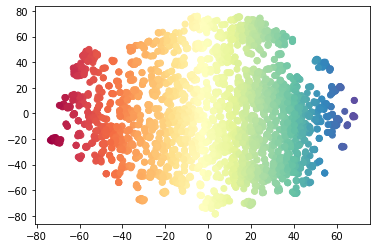

In [ ]:
#Visualize the TSNE plot
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
#%matplotlib inline
ax.scatter(df1['X'],df1['Y'],c=df1['X'],cmap='Spectral')
#label the data
#ax.set_xlim(-40,40)
#ax.set_ylim(-30,30)
plt.show()

In [ ]:
#Lets start recommending products
products = train_df[["StockCode", "Description"]]

In [ ]:
products

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,71053,WHITE METAL LANTERN
2,84406B,CREAM CUPID HEARTS COAT HANGER
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,84029E,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS
541905,22899,CHILDREN'S APRON DOLLY GIRL
541906,23254,CHILDRENS CUTLERY DOLLY GIRL
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE


In [ ]:
#remve the duplicates
products.drop_duplicates(inplace=True,subset='StockCode',keep='last')

In [ ]:
products.shape

(3673, 2)

In [ ]:
# create product-ID and product-description dictionary
products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

In [ ]:
products_dict

{'10002': ['INFLATABLE POLITICAL GLOBE '],
 '10080': ['GROOVY CACTUS INFLATABLE'],
 '10120': ['DOGGY RUBBER'],
 '10123C': ['HEARTS WRAPPING TAPE '],
 '10124A': ['SPOTS ON RED BOOKCOVER TAPE'],
 '10124G': ['ARMY CAMO BOOKCOVER TAPE'],
 '10125': ['MINI FUNKY DESIGN TAPES'],
 '10133': ['COLOURING PENCILS BROWN TUBE'],
 '10135': ['COLOURING PENCILS BROWN TUBE'],
 '11001': ['ASSTD DESIGN RACING CAR PEN'],
 '15030': ['FAN BLACK FRAME '],
 '15034': ['PAPER POCKET TRAVELING FAN '],
 '15036': ['ASSORTED COLOURS SILK FAN'],
 '15039': ['SANDALWOOD FAN'],
 '15044A': ['PINK PAPER PARASOL '],
 '15044B': ['BLUE PAPER PARASOL '],
 '15044C': ['PURPLE PAPER PARASOL'],
 '15044D': ['RED PAPER PARASOL'],
 '15056BL': ['EDWARDIAN PARASOL BLACK'],
 '15056N': ['EDWARDIAN PARASOL NATURAL'],
 '15056P': ['EDWARDIAN PARASOL PINK'],
 '15058A': ['BLUE POLKADOT GARDEN PARASOL'],
 '15058B': ['PINK POLKADOT GARDEN PARASOL'],
 '15058C': ['ICE CREAM DESIGN GARDEN PARASOL'],
 '15060B': ['FAIRY CAKE DESIGN UMBRELLA'],
 '16

In [ ]:
#Test the dictionary
products_dict['16162L']

['THE KING GIFT BAG']

In [ ]:
#Define the top 6  similar products for fasttext model
def similar_products(v,n=6):
    ms=model_ft.similar_by_vector(v,topn=n+1)
    return ms
    #extract the name and similarity
    #new_ms=[]
    #for j in ms:
        #pair=(products_dict[j[0][0],j[1]])
        #new_ms.append(pair)
    #return new_ms
    

In [ ]:
similar_products(model_ft['17109D'])

[('17109D', 0.9999999403953552),
 ('17013D', 0.6947062015533447),
 ('20823', 0.6562647819519043),
 ('20851', 0.6550087928771973),
 ('21087', 0.6430995464324951),
 ('51020B', 0.632304310798645),
 ('21318', 0.6286118030548096)]

In [ ]:
#Define the top 6  similar products
def similar_products(v,n=6):
    ms=model.similar_by_vector(v,topn=n+1)
    return ms
    #extract the name and similarity
    #new_ms=[]
    #for j in ms:
        #pair=(products_dict[j[0][0],j[1]])
        #new_ms.append(pair)
    #return new_ms
    

In [ ]:
similar_products(model['17109D'])

[('17109D', 1.0),
 ('85030', 0.7367414236068726),
 ('37333', 0.722691535949707),
 ('21087', 0.7141945362091064),
 ('20823', 0.7051359415054321),
 ('20826', 0.7035337686538696),
 ('84388', 0.6983408331871033)]

In [ ]:
from gensim.models import Doc2Vec